In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
from scipy.signal import stft
from scipy.signal import spectrogram

# Time Domain Plot

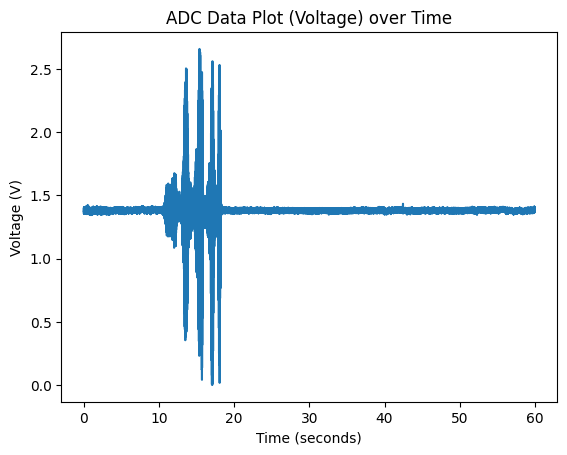

In [7]:
# Reference voltage for the ADC (replace with your actual Vref)
Vref = 3

# Sampling rate
sampling_rate = 120000  # samples per second

# Step 1: Read ADC Samples from a Text File
with open('E:/UCT/Masters/Traffic-Monitoring-Using-Doppler-Radar/ADC/output.txt', 'r') as file:
    lines = file.readlines()

# Convert the text data to a list of integers
adc_samples = [eval(sample.strip()) for sample in lines]
adc_samples = [item for sublist in adc_samples for item in sublist]

#print(adc_samples)
# Step 2: Convert ADC Values to Voltages
voltages = [(sample / 4095) * Vref for sample in adc_samples]

# Step 3: Create a time axis
time_axis = np.arange(0, len(voltages)) / sampling_rate

# Step 4: Plot the Data
plt.plot(time_axis[:], voltages[:])
plt.xlabel('Time (seconds)')
plt.ylabel('Voltage (V)')
plt.title('ADC Data Plot (Voltage) over Time')
plt.show()

# Plots Spectrogram of ADC Data

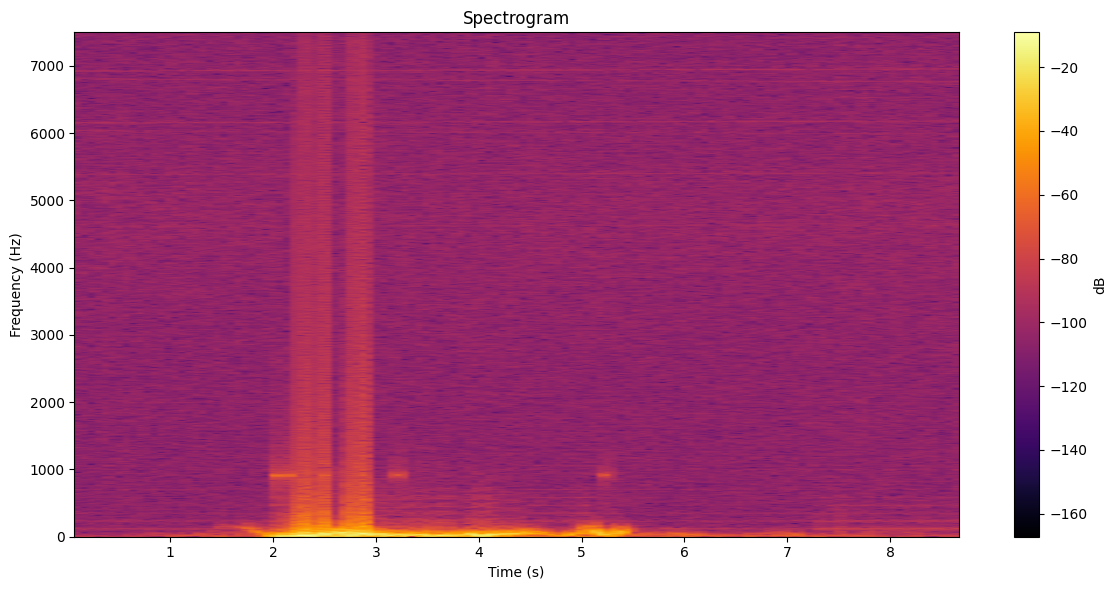

In [16]:
# Reference voltage for the ADC (replace with your actual Vref)
Vref = 3

# Sampling rate
sampling_rate = 120000  # samples per second

# Step 1: Read ADC Samples from a Text File
with open('E:/UCT/Masters/Traffic-Monitoring-Using-Doppler-Radar/ADC/output.txt', 'r') as file:
    lines = file.readlines()

# Convert the text data to a list of integers
adc_samples = [eval(sample.strip()) for sample in lines]
adc_samples = [item for sublist in adc_samples for item in sublist]

# Step 2: Convert ADC Values to Voltages
voltages = np.array([(sample / 4095) * Vref for sample in adc_samples])

# Step 3: Create a time axis
time_axis = np.arange(0, len(voltages)) / sampling_rate

# Create a spectrogram
frequencies, times, Sxx = spectrogram(voltages, fs=sampling_rate, nperseg=16384, noverlap=8192)

# Plot the original spectrogram
plt.figure(figsize=(12, 6))
plt.imshow(10 * np.log10(Sxx), aspect='auto', cmap='inferno', origin='lower',
           extent=[times.min(), times.max(), frequencies.min(), frequencies.max()])
plt.ylim(0, 7500)
plt.colorbar(label='dB')
plt.title('Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.tight_layout()
plt.show()

# Applies Guassian Smoothing Before Plotting

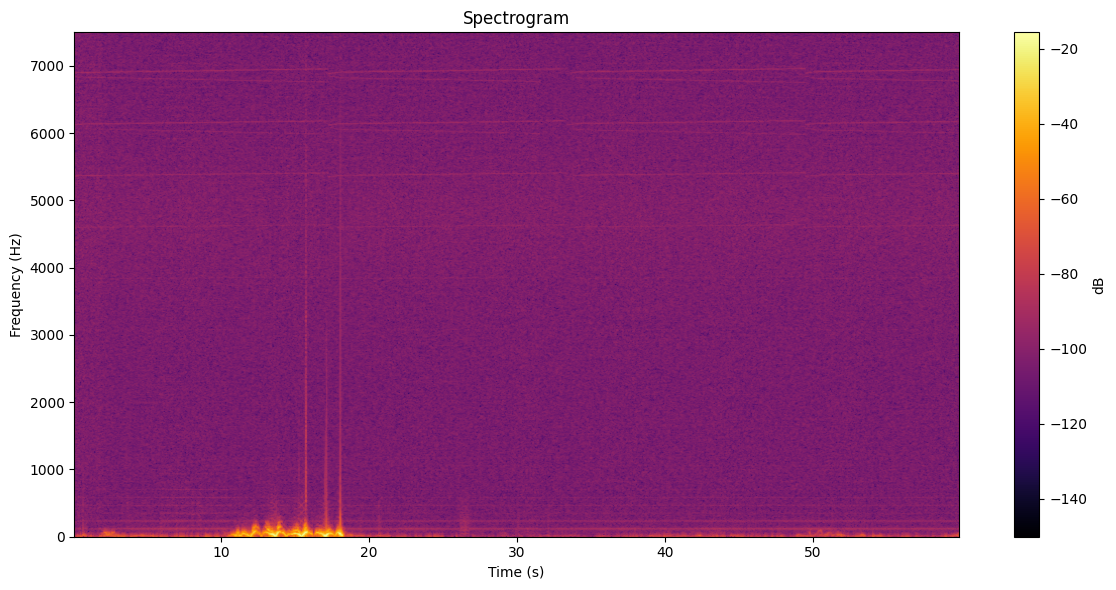

In [9]:
# Reference voltage for the ADC (replace with your actual Vref)
Vref = 3

# Sampling rate
sampling_rate = 120000  # samples per second

# Step 1: Read ADC Samples from a Text File
with open('E:/UCT/Masters/Traffic-Monitoring-Using-Doppler-Radar/ADC/output.txt', 'r') as file:
    lines = file.readlines()

# Convert the text data to a list of integers
adc_samples = [eval(sample.strip()) for sample in lines]
adc_samples = [item for sublist in adc_samples for item in sublist]

#print(adc_samples)
# Step 2: Convert ADC Values to Voltages
voltages = np.array([(sample / 4095) * Vref for sample in adc_samples])

# Step 3: Create a time axis
time_axis = np.arange(0, len(voltages)) / sampling_rate

# Create a spectrogram
frequencies, times, Sxx = spectrogram(voltages, fs=sampling_rate, nperseg=16384, noverlap=8192)

# Apply Gaussian smoothing
from scipy.ndimage import gaussian_filter
Sxx_smoothed = gaussian_filter(10 * np.log10(Sxx), sigma=(0.5, 0.5))

# Plot the spectrogram with improvements
plt.figure(figsize=(12, 6))
plt.imshow(Sxx_smoothed, aspect='auto', cmap='inferno', origin='lower',
           extent=[times.min(), times.max(), frequencies.min(), frequencies.max()])
plt.ylim(0,7500)
plt.colorbar(label='dB')
plt.title('Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.tight_layout()
#plt.savefig('SpectorgramofVeroboardAmplifier.pdf', format = 'pdf')
plt.show()